In [7]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [8]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11501568/11490434 [==============================] - 0s 0us/step


**Preprocessing**

In [9]:
import matplotlib.pyplot as plt

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Exponential part of a 32 bit float is 8 bits which holds values from 0 to 255. Division by
# 255 for each element will normalize it to a value between 0 and 1.
x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

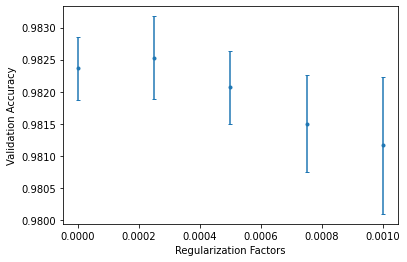

In [23]:
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import pandas as pd
from google.colab import files

regularization_factors = np.linspace(0.000001, 0.001, 5)

# scores = []
# epochs = 40

# for i in range(5):
#     for _ in range(3):
#         model = Sequential()
#         model.add(Flatten())
#         model.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_factors[i])))
#         model.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_factors[i])))
#         model.add(Dense(num_classes, activation='softmax'))


#         model.compile(loss=keras.losses.categorical_crossentropy,
#                        optimizer= optimizers.SGD(learning_rate = 0.1),
#                 metrics=['accuracy'],)

#         fit_info = model.fit(x_train, y_train,
#                    batch_size=batch_size,
#                    epochs=epochs,
#                    verbose=0,
#                    validation_data=(x_test, y_test))
#         score = model.evaluate(x_test, y_test, verbose=0)

#         scores.append(score)

# results = pd.DataFrame(scores, columns=['loss', 'accuracy'])

# results.to_csv('results.csv')
# files.download('results.csv')


results = pd.read_csv('results.csv')
accuracy = results['accuracy']

mean_vals = []
std_vals = []

for i in range(5):
    mean_vals.append(statistics.mean(accuracy[i*3:i*3+3]))
    std_vals.append(statistics.stdev(accuracy[i*3:i*3+3]))

x = regularization_factors
y = mean_vals # the accuracies
e = std_vals # the std

plt.xlabel('Regularization Factors')
plt.ylabel('Validation Accuracy')

plt.errorbar(x, y, e, linestyle='None', marker='.', capsize=2)


plt.show()

In [12]:
# Question 3. Use Model with 2 Convolutional Layers

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import optimizers

epochs = 10
batch_size = 128
num_classes = 10

def model_1(name, filters):
  model = Sequential()

  model.add(Conv2D(filters=filters, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=filters, kernel_size=(3,3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer= optimizers.SGD(learning_rate = 0.1),
          metrics=['accuracy'],)

  fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss: {}, Test accuracy {} for {}'.format(score[0], score[1], name))


model_1("32 filters", 32)
model_1("64 filters", 64)
model_1("128 filters", 128)

Test loss: 0.03993663191795349, Test accuracy 0.9866999983787537 for 32 filters
Test loss: 0.04289871081709862, Test accuracy 0.9854999780654907 for 64 filters
Test loss: 0.03744689002633095, Test accuracy 0.9876000285148621 for 128 filters


In [13]:
def model_2(name, units):
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(units, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer= optimizers.SGD(learning_rate = 0.1),
          metrics=['accuracy'],)

  fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss: {}, Test accuracy {} for {}'.format(score[0], score[1], name))

model_2("32 Units", 32)
model_2("64 Units", 64)
model_2("128 Units", 128)

Test loss: 0.03701183944940567, Test accuracy 0.9879000186920166 for 32 Units
Test loss: 0.035434868186712265, Test accuracy 0.9873999953269958 for 64 Units
Test loss: 0.0378899984061718, Test accuracy 0.9872000217437744 for 128 Units


In [14]:
def model_3(name, dropout):
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
  model.add(Dropout(dropout))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer= optimizers.SGD(learning_rate = 0.1),
          metrics=['accuracy'],)

  fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss: {}, Test accuracy {} for {}'.format(score[0], score[1], name))
  return model

model_3("Dropout 0.5", 0.5)
model_3("Dropout 0.65", 0.65)
model_3("Dropout 0.8", 0.8)

Test loss: 0.04241444170475006, Test accuracy 0.9851999878883362 for Dropout 0.5
Test loss: 0.03968164324760437, Test accuracy 0.9872999787330627 for Dropout 0.65
Test loss: 0.0506596565246582, Test accuracy 0.9837999939918518 for Dropout 0.8
INFO:tensorflow:Assets written to: ram://6bd11023-87b9-4dbb-b098-accbab1ae8e7/assets


In [22]:
import pickle

def model_final(name):
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer= optimizers.SGD(learning_rate = 0.1),
          metrics=['accuracy'],)

  fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss: {}, Test accuracy {} for {}'.format(score[0], score[1], name))
  return model

model = model_final("final model")

pickle.dump(model, open("final_model.sav", 'wb'))
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

Test loss: 0.0370384119451046, Test accuracy 0.9889000058174133 for final model
INFO:tensorflow:Assets written to: ram://a768530e-84e2-4f66-a87d-040625133eb2/assets
